In [1]:
from SC_VCG_multiprocess import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
agent = [40,80,120]
bid_num = 6
# 第三张图：40/80/120-6bids 四张子图，对比5个指标

In [3]:
# 读取数据
platform_real_ratio = 1.0
N_t = [[] for i in range(3)]

SC_VCG_W_N = [[]for i in range(3)]
SC_VCG_profits= [[]for i in range(3)]
SC_AP= [[]for i in range(3)]
SC_Exchange= [[]for i in range(3)]

SCE_VCG_W_N= [[]for i in range(3)]
SCE_VCG_profits= [[]for i in range(3)]
SCE_AP= [[]for i in range(3)]
SCE_Exchange= [[]for i in range(3)]
SCE_PExchange= [[]for i in range(3)]

index = 0
for agent_num in agent:
    mean_SC_VCG = read_pkl('SC-VCG',agent_num,bid_num,platform_real_ratio)
    mean_SCE_VCG = read_pkl('SCE-VCG',agent_num,bid_num,platform_real_ratio)
    for key in mean_SC_VCG:
        N_t[index].append(agent_num - key)               # t = [key for key in SC_VCG]   #横坐标
        value1 = mean_SC_VCG[key]
        value2 = mean_SCE_VCG[key] 
        SC_VCG_W_N[index].append(value1[0])
        SC_VCG_profits[index].append(value1[1])
        SC_AP[index].append(value1[0]-value1[1])
        SC_Exchange[index].append(value1[3])
        
        SCE_VCG_W_N[index].append(round(value2[0],2))
        SCE_VCG_profits[index].append(round(value2[1],2))
        SCE_AP[index].append(round(value2[0]-value2[1],2))     
        SCE_Exchange[index].append(round(value2[3],2))
        SCE_PExchange[index].append(round(value2[5],2))
    index += 1

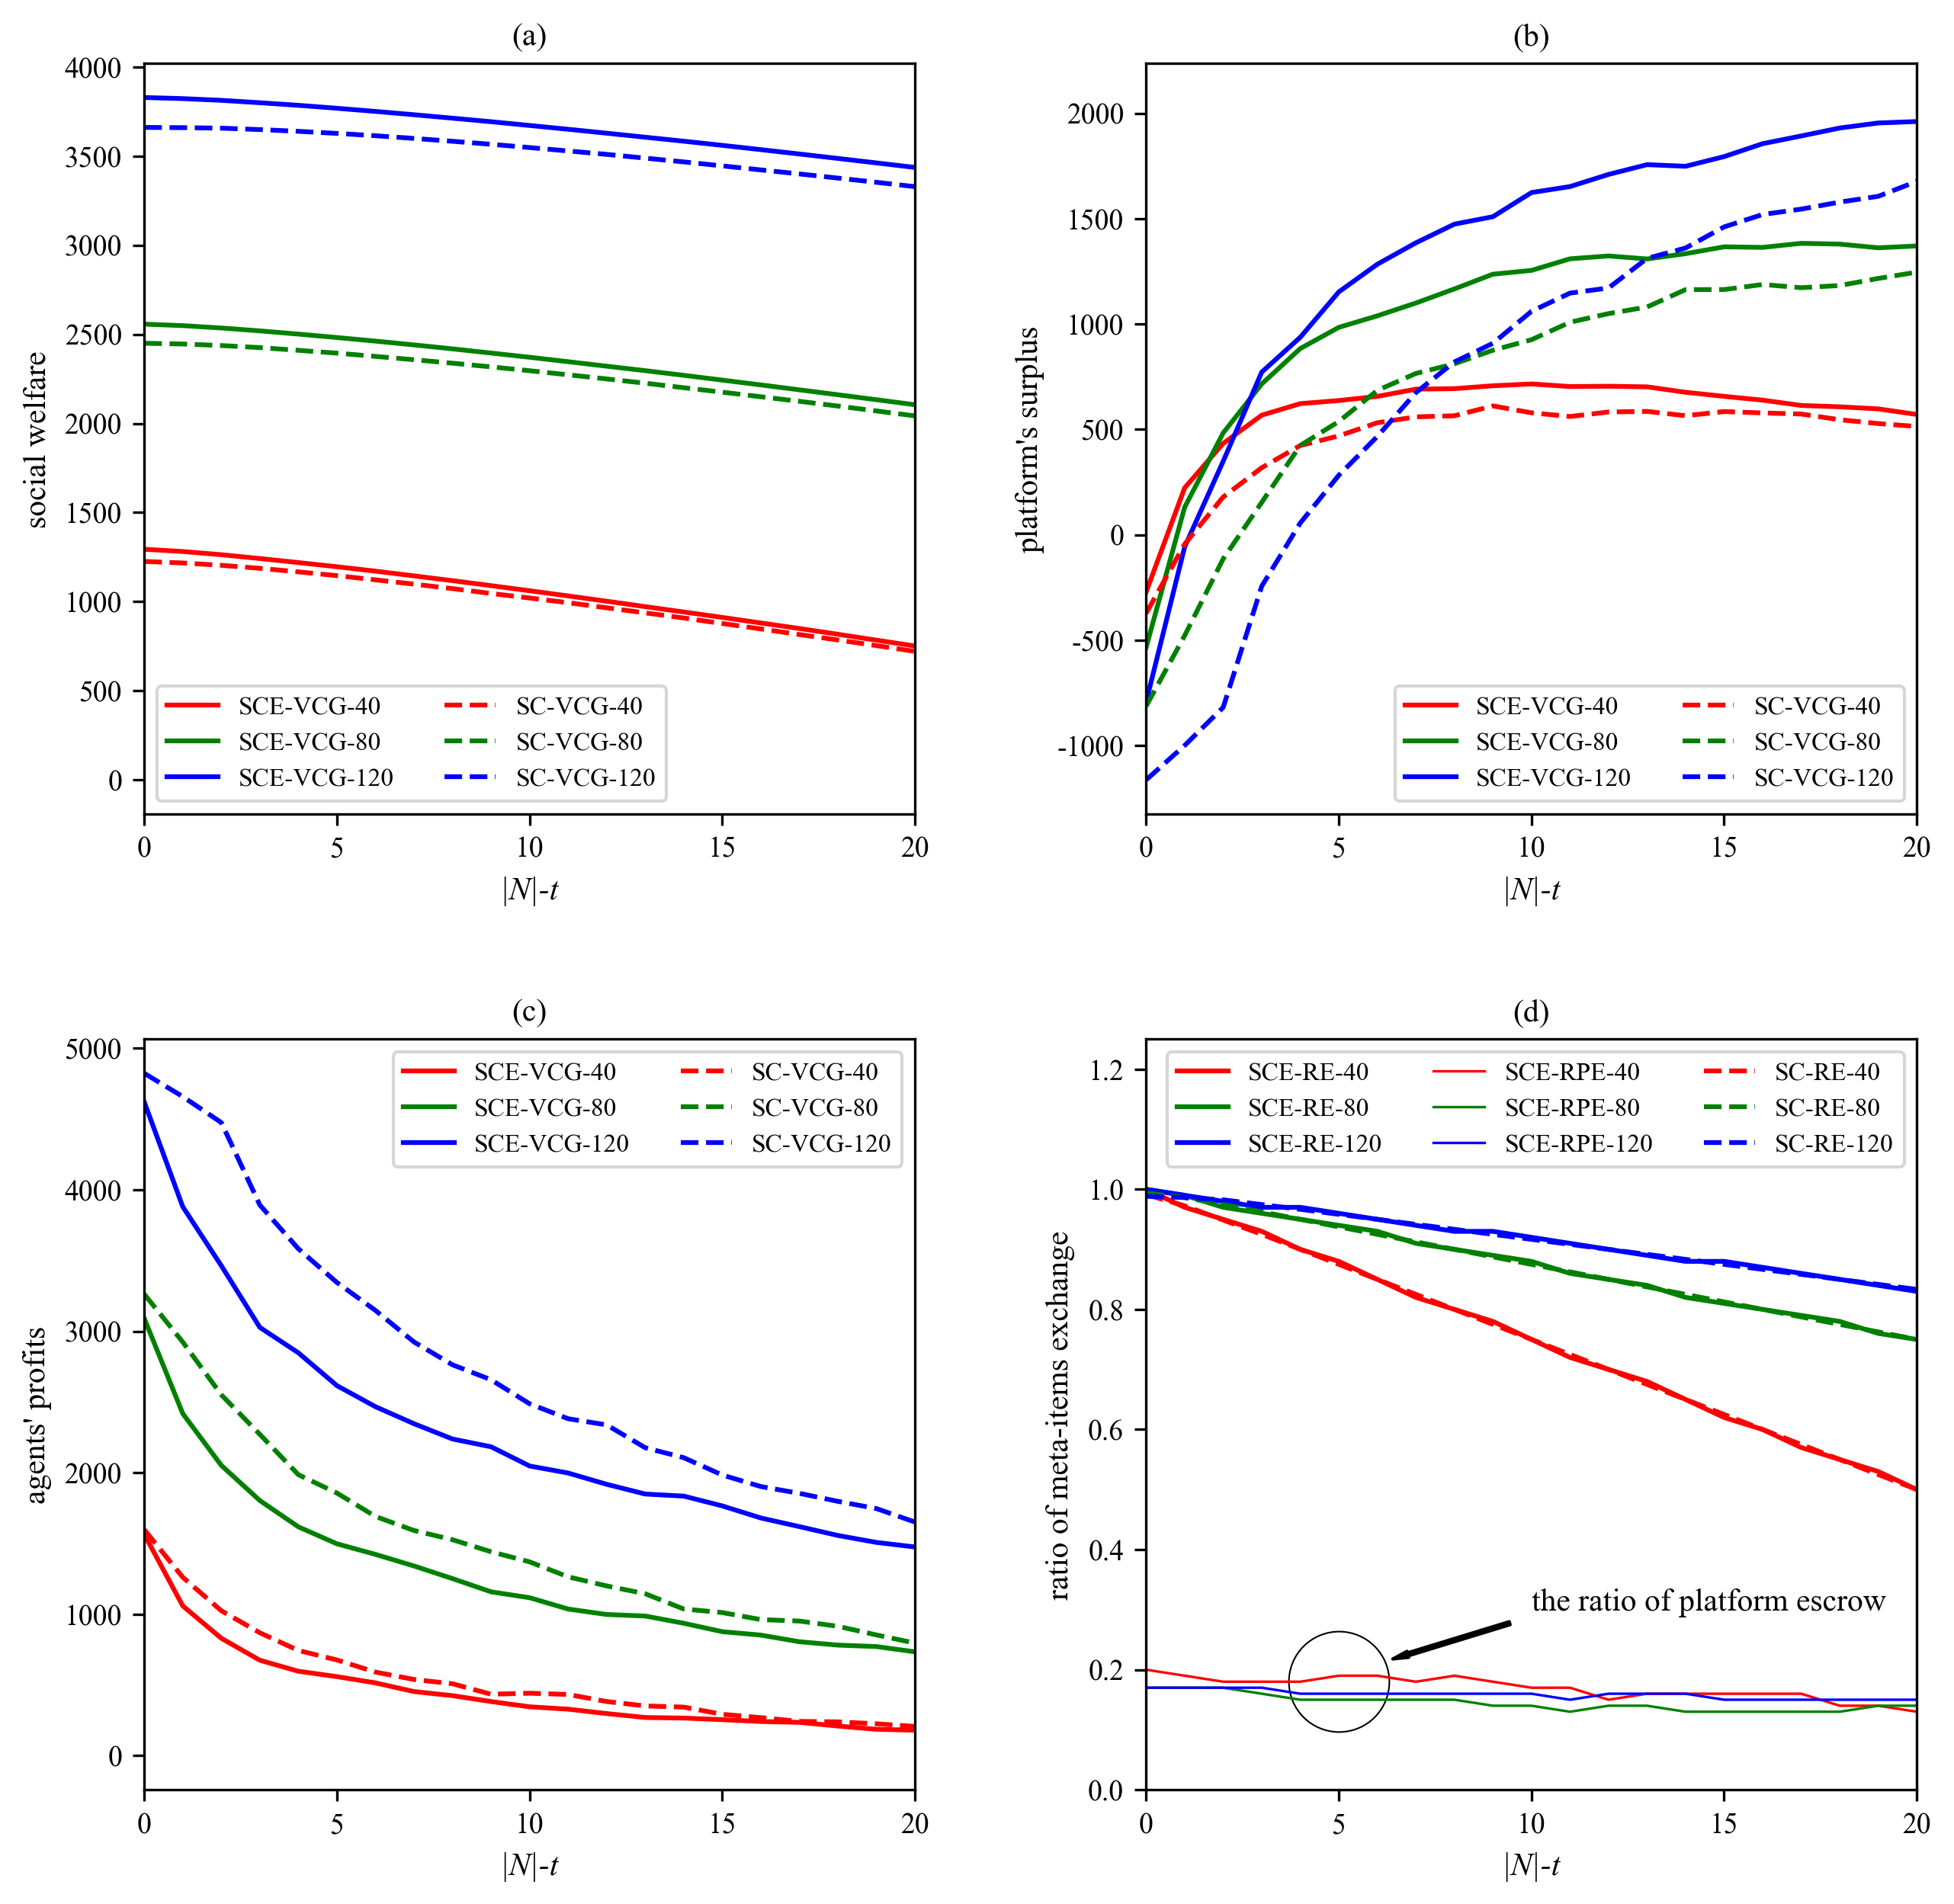

In [11]:
# 画图
plt.figure('Fig3', figsize = (10, 10),dpi = 300)
line_style = ['-', '--']
# colors = ["#d5695d","#5d8ca8","#65a479","#a564c9"]

plt.subplot(221)
y_max = max(max(SC_VCG_W_N),max(SCE_VCG_W_N))   
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(N_t[0], SCE_VCG_W_N[0], c='red', label='SCE-VCG-40', linestyle=line_style[0])
plt.plot(N_t[1], SCE_VCG_W_N[1], c='green', label='SCE-VCG-80', linestyle=line_style[0])
plt.plot(N_t[2], SCE_VCG_W_N[2], c='blue', label='SCE-VCG-120', linestyle=line_style[0])
plt.plot(N_t[0], SC_VCG_W_N[0], c='red', label="SC-VCG-40", linestyle=line_style[1])
plt.plot(N_t[1], SC_VCG_W_N[1], c='green', label="SC-VCG-80", linestyle=line_style[1])
plt.plot(N_t[2], SC_VCG_W_N[2], c='blue', label="SC-VCG-120", linestyle=line_style[1])
x_major_locator = MultipleLocator(5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,20)
# plt.ylim(1000,3000)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8},ncol =2)
plt.grid(False)
plt.xlabel("|N|-t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("social welfare", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(a)", fontdict={'family' : 'Times New Roman','size': 10})     

plt.subplot(222)          
y_max = max(max(SC_VCG_profits),max(SCE_VCG_profits)) 
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(N_t[0], SCE_VCG_profits[0], c='red', label='SCE-VCG-40', linestyle=line_style[0])
plt.plot(N_t[1], SCE_VCG_profits[1], c='green', label='SCE-VCG-80', linestyle=line_style[0])
plt.plot(N_t[2], SCE_VCG_profits[2], c='blue', label='SCE-VCG-120', linestyle=line_style[0])
plt.plot(N_t[0], SC_VCG_profits[0], c='red', label="SC-VCG-40", linestyle=line_style[1])
plt.plot(N_t[1], SC_VCG_profits[1], c='green', label="SC-VCG-80", linestyle=line_style[1])
plt.plot(N_t[2], SC_VCG_profits[2], c='blue', label="SC-VCG-120", linestyle=line_style[1])
x_major_locator = MultipleLocator(5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,20)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8},ncol =2)
plt.grid(False)
plt.xlabel("|N|-t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("platform's surplus",fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(b)", fontdict={'family' : 'Times New Roman','size': 10})     


plt.subplot(223)   
y_max = 1
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(N_t[0], SCE_AP[0], c='red', label='SCE-VCG-40', linestyle=line_style[0])
plt.plot(N_t[1], SCE_AP[1], c='green', label='SCE-VCG-80', linestyle=line_style[0])
plt.plot(N_t[2], SCE_AP[2], c='blue', label='SCE-VCG-120', linestyle=line_style[0])
plt.plot(N_t[0], SC_AP[0], c='red', label="SC-VCG-40", linestyle=line_style[1])
plt.plot(N_t[1], SC_AP[1], c='green', label="SC-VCG-80", linestyle=line_style[1])
plt.plot(N_t[2], SC_AP[2], c='blue', label="SC-VCG-120", linestyle=line_style[1])
x_major_locator = MultipleLocator(5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,20)
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8},ncol =2)
plt.grid(False)
plt.xlabel("|N|-t",fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("agents' profits", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(c)",fontdict={'family' : 'Times New Roman','size': 10})     


plt.subplot(224)  
y_max = 1  
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(N_t[0], SCE_Exchange[0], c='red', label='SCE-RE-40', linestyle=line_style[0])
plt.plot(N_t[1], SCE_Exchange[1], c='green', label='SCE-RE-80', linestyle=line_style[0])
plt.plot(N_t[2], SCE_Exchange[2], c='blue', label='SCE-RE-120', linestyle=line_style[0])
plt.plot(N_t[0], SCE_PExchange[0], c='red', label='SCE-RPE-40', linestyle=line_style[0],linewidth = 0.8)
plt.plot(N_t[1], SCE_PExchange[1], c='green', label='SCE-RPE-80', linestyle=line_style[0],linewidth = 0.8)
plt.plot(N_t[2], SCE_PExchange[2], c='blue', label='SCE-RPE-120', linestyle=line_style[0],linewidth = 0.8)
plt.plot(N_t[0], SC_Exchange[0], c='red', label="SC-RE-40", linestyle=line_style[1])
plt.plot(N_t[1], SC_Exchange[1], c='green', label="SC-RE-80", linestyle=line_style[1])
plt.plot(N_t[2], SC_Exchange[2], c='blue', label="SC-RE-120", linestyle=line_style[1])
# plt.plot(t, SCE_PExchange, c='green', label='SCE-VCG PRE', linestyle=line_style[1])

plt.annotate('the ratio of platform escrow',(6,0.21),(10,0.3),xycoords='data',
            arrowprops=dict(width=1,headwidth=2,headlength=5,facecolor='black',shrink=0.1),c='black',fontsize=10,family= 'Times New Roman')
plt.scatter(5,0.18,color='w',marker='o',edgecolor='black',s=1000,linewidth=0.5)

plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8},ncol =3)
plt.grid(False)
plt.xlim(0,20)
plt.ylim(0,1.25)
x_major_locator = MultipleLocator(5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel("|N|-t",fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("ratio of meta-items exchange",fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(d)", fontdict={'family' : 'Times New Roman','size': 10})     


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# plt.autofmt_xdate()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
path = './pic/'
pic_name = path + str(bid_num) + '_40-80-120'+ 'Fig3.1' + '.png'
plt.savefig(pic_name,dpi = 300,bbox_inches ="tight",transparent = True)
plt.show()